In [1]:
%matplotlib inline

import obspy
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from obspy import Trace
from fftvec import fftvec

plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.titlesize'] = 8

# Python adaptation of lab_dispersion by Carl Tape for UAF GEOS 626
# Coding by Amanda McPherson (Jan 2021)

# Calls markt.py and fftvec.py

# Run this cell at the beginning of each session

In [2]:
# Input parameters, constants, and data

deg = 180/np.pi

# target periods for measurements
Ttarvec = np.array([20, 30, 40, 50])
ftarvec = 1/Ttarvec
numtar = len(ftarvec)

# distance between PAS and NEE (km)
delx = 331

# axes limits for dispersion plots of speed (km/s) vs period (s)
ax_1 = [18, 52, 2.8, 4.6]
    
# we are told that the phase velocity at each period must fall within these ranges
cran = np.array([[3.1, 3.9], [3.0, 4.3], [3.3, 4.5], [3.3, 4.5]])

# load data files
file1 = './data/pas.dat'
file2 = './data/nee.dat'

ti, ynee = np.loadtxt(file2,unpack=True)
ti_pas, ypas = np.loadtxt(file1,unpack=True)

dt = ti[1] - ti[0]

# for FFT an even number is extremely helpful, so chop off the first point
mask = np.ones(len(ti), dtype=bool)
mask[0] = False
ti = ti[mask]
ynee = ynee[mask]
ypas = ypas[mask]
nt = len(ti)

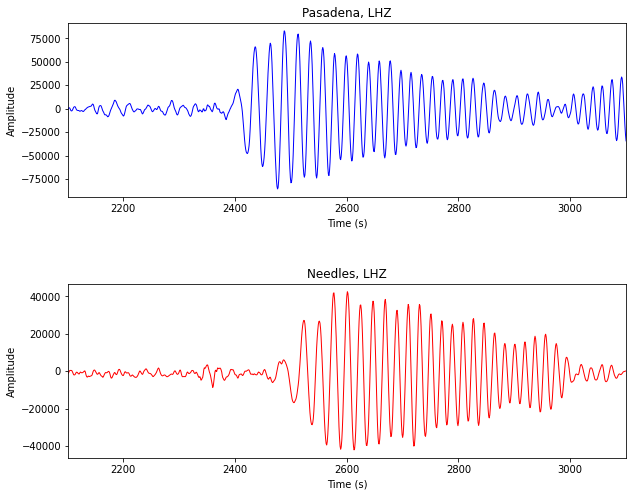

In [3]:
# Plotting seismograms

# use hilbert transform to compute envelope
ypasen = abs(signal.hilbert(ypas))
yneeen = abs(signal.hilbert(ynee))

xran = np.array([ti[0], ti[-1]])

# plotting
fig1, ax1 = plt.subplots(2,1,num=1)

ax1[0].plot(ti,ypas,'b')
#ax1[0].plot(ti,ypasen,'k--',ti,-ypasen,'k--')   # envelope
ax1[0].set(xlabel='Time (s)', ylabel='Amplitude', title='Pasadena, LHZ')
ax1[0].set_xlim(xran)

ax1[1].plot(ti,ynee,'r')
#ax1[1].plot(ti,yneeen,'k--',ti,-yneeen,'k--')   # envelope
ax1[1].set(xlabel='Time (s)', ylabel='Amplitude', title='Needles, LHZ')
ax1[1].set_xlim(xran)

plt.subplots_adjust(hspace=0.5)
plt.show()

check the first entry of the FFT:
sum(ypas) = 
 -572964.0
mean(ypas)*npt = 
 -572964.0
H[0] = 
 (-572964+0j)
6.45182105346e-10


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


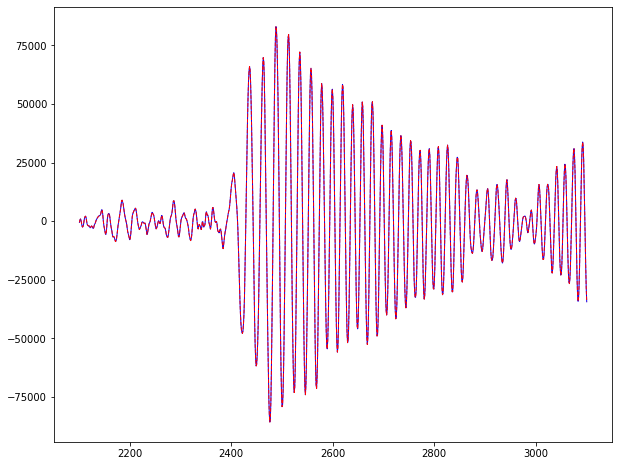

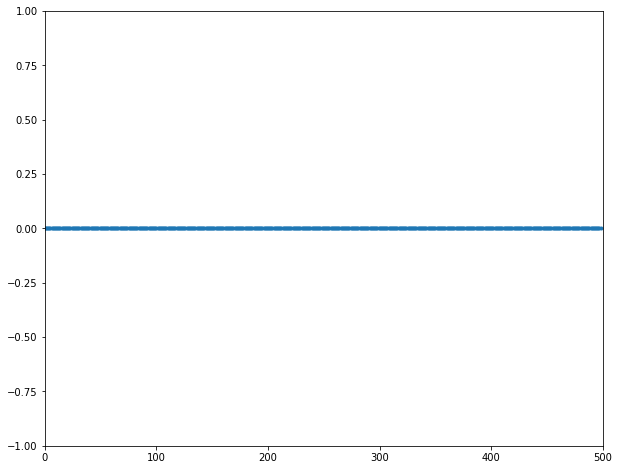

In [9]:
# COMPUTE FOURIER TRANSFORM, THEN PLOT AMPLITUDE SPECTRUM

# frequency vector
npt = nt
f = fftvec(ti)     # note: negative frequencies

Hp = np.fft.fft(ypas) 
Ap = abs(Hp)    # =sqrt(H.*conj(H)), where P=H.*conj(H) is the power spectral density
Hn = np.fft.fft(ynee)
An = abs(Hn)

# explore these to see various details with the FFT
if False:
    y = ypas
    H = Hp
    A = Ap;
    imax = int(npt/2+1)
    ip = np.arange(1,imax+1)
    
    print('check the first entry of the FFT:')
    print('sum(ypas) = \n', np.sum(ypas))
    print('mean(ypas)*npt = \n', np.mean(ypas)*npt)
    print('H[0] = \n', H[0])
    
    # check the difference between abs and power
    # if z = a + bi, then abs(z) = sqrt(z z*)
    print(np.linalg.norm( A*A - H*np.conjugate(H) ) / np.linalg.norm( A ))
    
    # compare IFFT[FFT[y(t)]] with y(t)
    plt.figure()
    plt.plot(ti,y,'b')
    plt.plot(ti,np.fft.ifft(H),'r--')
    
    # check the ordering of the complex entries of H
    plt.figure()
    plt.plot(np.real(H[1:imax-1]) - np.real(H[npt:imax-1:-1]),'.')
    plt.axis([0, 500, -1, 1])
    
    plt.show()

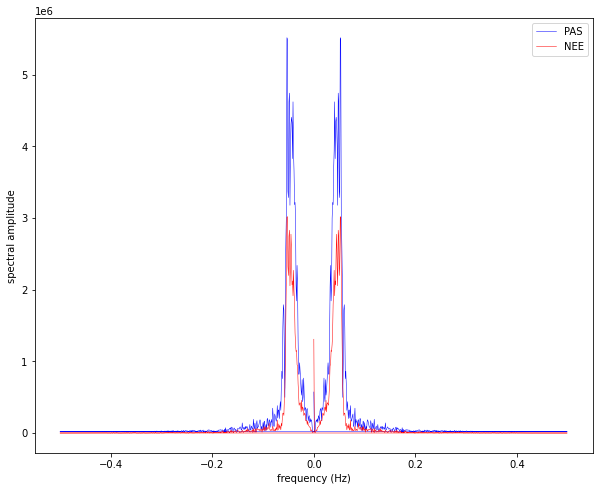

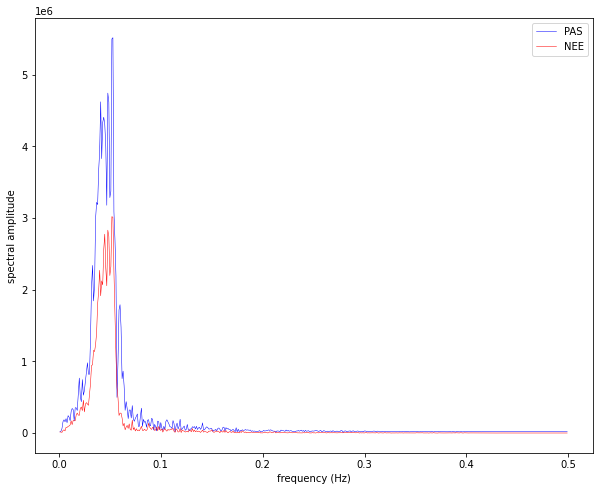

In [5]:
# plot the spectrum for PAS and NEE

# positive and negative frequencies

plt.figure()
plt.plot(f,Ap,'b',lw=0.5,label='PAS')
plt.plot(f,An,'r',lw=0.5,label='NEE')
plt.legend(loc='upper right')
plt.xlabel('frequency (Hz)')
plt.ylabel('spectral amplitude')

# positive frequencies only
ipos = np.nonzero(f>0)

plt.figure()
plt.plot(f[ipos],Ap[ipos],'b',lw=0.5,label='PAS')
plt.plot(f[ipos],An[ipos],'r',lw=0.5,label='NEE')
plt.legend(loc='upper right')
plt.xlabel('frequency (Hz)')
plt.ylabel('spectral amplitude')

plt.show()

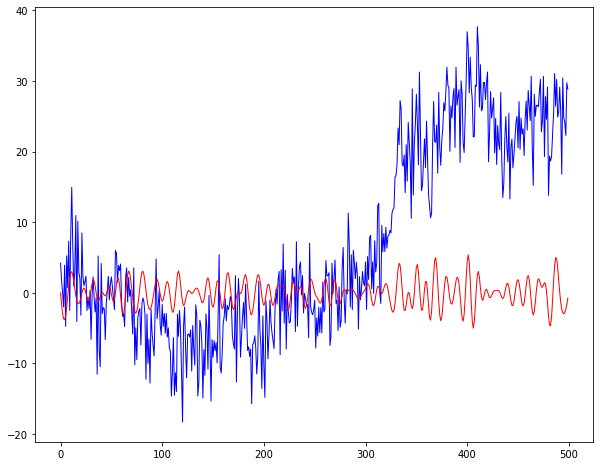

In [6]:
# CODE HERE FOR GROUP SPEED (use a bandpass filter)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

# Example of setting up and using a bandpass filter

if True:
    # Create random signal
    sig = np.random.randn(500)*4 + np.random.randn(500).cumsum()
    
    # Create the filter:
    fa = 0.1
    fb = 0.25
    
    b, a = signal.butter(4, [fa, fb], btype='bandpass')
    
    # Apply the filter to the signal
    sig_filt = signal.filtfilt(b,a,sig)
    
    # Plot both
    
    plt.figure()
    plt.plot(sig,'b')
    plt.plot(sig_filt,'r')
    plt.show()
    
    

In [7]:
# CODE HERE FOR HARMONICS (No bandpass needed)

# fourier transform of Pasadena and Needles seismograms
Hp = np.fft.fft(ypas)
Hn = np.fft.fft(ynee)

# Check out the dimensions of variables
print(ti.shape)
print(ypas.shape)
print(ynee.shape)
print(f.shape)
print(Hp.shape)
print(Hn.shape)

tlims = [2580, 2780]

for ii in range(numtar):
    # target frequency for harmonic
    ftar = ftarvec[ii]
    
    # initialize harmonics
    Hp2 = np.array(np.zeros(npt), dtype=complex)
    Hn2 = np.array(np.zeros(npt), dtype=complex)
    
    # get ftar and -ftar from the frequency vector
    # (this will avoid having python tell you that it will ignore the
    # complex conjugate parts when using ifft)
    itemp = np.argsort(abs(abs(f)-ftar))
    itemp = itemp[0:2]
    print(f[itemp])
    
    # CODE HERE FOR HARMONICS
    #Hp2 
    #Hn2 

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
[ 0.05 -0.05]
[-0.033  0.033]
[ 0.025 -0.025]
[-0.02  0.02]


In [ ]:
# CODE HERE FOR PHASE SPEED
